In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

/tmp/ipykernel_62619/3583778346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


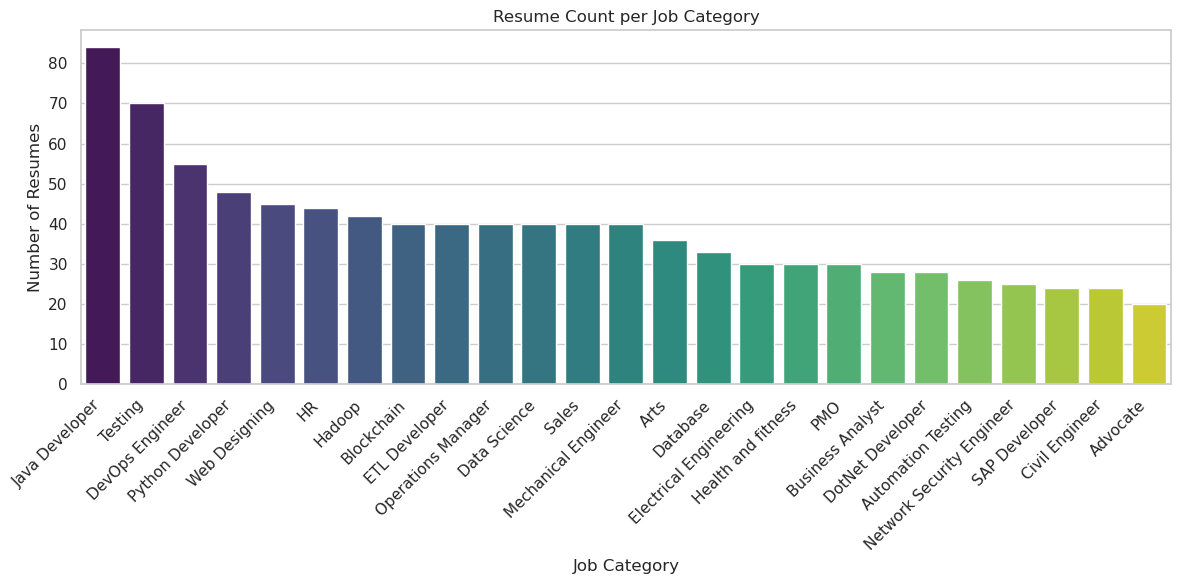

In [8]:
sns.set(style="whitegrid")

category_counts = df['Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Resume Count per Job Category")
plt.xlabel("Job Category")
plt.ylabel("Number of Resumes")
plt.tight_layout()
plt.show()

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
import re

def cleanResume(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs (http, https, ftp etc.)
    text = re.sub(r'http\S+', ' ', text)
    
    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', ' ', text)
    
    # Remove hashtags (e.g., #AI)
    text = re.sub(r'#\w+', ' ', text)
    
    # Remove RT (retweet) and cc
    text = re.sub(r'\brt\b|\bcc\b', ' ', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[{}]'.format(re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")), ' ', text)
    
    # Remove non-ASCII characters (e.g., emojis, accented chars)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


<>:20: SyntaxWarning: invalid escape sequence '\]'
<>:20: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipykernel_62619/76324764.py:20: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub(r'[{}]'.format(re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")), ' ', text)


In [11]:
df['Resume'] = df['Resume'].apply(cleanResume)

In [12]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Category'] = label.fit_transform(df['Category'])

In [14]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Resume'],df['Category'],test_size=0.2)

In [16]:
x_train

720    technical expertise db languages sql database ...
353    technicalskills springmvc hibernate jdbc java ...
794    technical summary knowledge of informatica pow...
573    training attended 1 successfully completed esd...
17     education details b tech rayat and bahra insti...
                             ...                        
705    skills exceptional communication and networkin...
318    personal skills passionate towards learning ne...
374    skills language java operating system windows ...
315    skills 1 autocad 2 pro v 3 catia 4 word excel ...
548    key competencies multi operations management p...
Name: Resume, Length: 769, dtype: object

In [17]:
y_train

720     7
353    15
794    10
573    20
17      6
       ..
705    19
318     5
374    15
315     5
548    18
Name: Category, Length: 769, dtype: int64

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer() 

In [19]:
x_train_word = cv1.fit_transform(x_train).toarray()
x_test_word = cv1.transform(x_test).toarray()

In [20]:
x_train_word

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv2 = TfidfVectorizer()

In [22]:
x_train_word2 = cv2.fit_transform(x_train).toarray()
x_test_word2 = cv2.transform(x_test).toarray()

In [23]:
x_train_word2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Appy Model  SVC

In [26]:
# model : 1
svc_model = SVC()
svc_model.fit(x_train_word,y_train)
y_pred_svc = svc_model.predict(x_test_word)
print(accuracy_score(y_test,y_pred_svc))

0.7875647668393783


In [27]:
# model : 2
svc_model2 = SVC()
svc_model2.fit(x_train_word2,y_train)
y_pred_svc2 = svc_model2.predict(x_test_word2)
print(accuracy_score(y_test,y_pred_svc2))

1.0


# Appy Model  RandomForestClassifier

In [28]:
forest_model =  RandomForestClassifier()

forest_model.fit(x_train_word2,y_train)

y_pred_forest = forest_model.predict(x_test_word2)
print(accuracy_score(y_test,y_pred_forest))

1.0


# Appy Model  GaussianNB

In [30]:
naive_model = GaussianNB()
naive_model.fit(x_train_word2,y_train)
y_pred_naive = naive_model.predict(x_test_word2)
print(accuracy_score(y_test,y_pred_naive))

1.0


In [31]:

import pickle
pickle.dump(cv2,open('tfidf.pkl','wb'))
pickle.dump(svc_model2, open('model.pkl', 'wb'))
pickle.dump(label, open("label_encoder.pkl",'wb'))